## Analitica de resultados del icfes
Este proyecto nace como una iniciativa real de analisis


## Fase 1: Analisis exploratorio

En esta fase se realizara un analisis exploratorio de los datos para comenzar a identificar patrones y la informacion de mayor relevancia

Preguntas clave

* ¿Qué dimensiones tienen los datos?
* ¿Con cuántos años y periodos de evaluación se cuenta?
* ¿Cuáles variables pueden ser de interés para la problemática planteada?
* ¿Qué porcentaje de datos faltantes o no válidos hay en las columnas de interés? ¿Qué planteas para manejarlos?

Estrategias utilizadas

* Imputacion de data, descriptivos de data, analisis de N/A

In [1]:
# Librerias 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import linear_model 
from sklearn.metrics import mean_squared_error, r2_score  
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression 
import panel as pn 
import plotly.graph_objects as go
import ipywidgets as widgets 
from sklearn.impute import SimpleImputer 
from string import ascii_letters
import statsmodels.api as sm
import pylab as py
from matplotlib import style
import statsmodels.api as sm
from scipy import stats
from statsmodels.formula.api import ols
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from ipywidgets import interactive

#### 1.1 Importación de los datos 

In [2]:
df2022_1 = pd.read_csv("Data_Icfes_SABER11_2022-1_v2.TXT", encoding = 'UTF-8', delimiter = '¬')
df2021_2 = pd.read_csv("SB11_20212.txt", encoding = 'UTF-8', delimiter = '¬')
df2021_1 = pd.read_csv("SB11_20211.txt", encoding = 'UTF-8', delimiter = '¬')
df2020_1 = pd.read_csv("SB11_20201.txt", encoding = 'UTF-8', delimiter = '¬')

C:\Users\OMEN Laptop\AppData\Local\Temp\ipykernel_21344\4171979922.py:1: ParserWarning: Falling back to the 'python' engine because the separator encoded in utf-8 is > 1 char long, and the 'c' engine does not support such separators; you can avoid this warning by specifying engine='python'.
  df2022_1 = pd.read_csv("Data_Icfes_SABER11_2022-1_v2.TXT", encoding = 'UTF-8', delimiter = '¬')
C:\Users\OMEN Laptop\AppData\Local\Temp\ipykernel_21344\4171979922.py:2: ParserWarning: Falling back to the 'python' engine because the separator encoded in utf-8 is > 1 char long, and the 'c' engine does not support such separators; you can avoid this warning by specifying engine='python'.
  df2021_2 = pd.read_csv("SB11_20212.txt", encoding = 'UTF-8', delimiter = '¬')
C:\Users\OMEN Laptop\AppData\Local\Temp\ipykernel_21344\4171979922.py:3: ParserWarning: Falling back to the 'python' engine because the separator encoded in utf-8 is > 1 char long, and the 'c' engine does not support such separators; you 

#### 1.2  Dimensiones de los datos

In [3]:
print("Base 2022_1")
print("Elementos: "+str(df2022_1.size))
print("Total filas: "+str(len(df2022_1.index)))
print("Total columnas: "+str(len(df2022_1.columns)))
print("")
print("Base 2021_2")
print("Elementos: "+str(df2021_2.size))
print("Total filas: "+str(len(df2021_2.index)))
print("Total columnas: "+str(len(df2021_2.columns)))
print("")
print("Base 2021_1")
print("Elementos: "+str(df2021_1.size))
print("Total filas: "+str(len(df2021_1.index)))
print("Total columnas: "+str(len(df2021_1.columns)))
print("")
print("Base 2020_1")
print("Elementos: "+str(df2020_1.size))
print("Total filas: "+str(len(df2020_1.index)))
print("Total columnas: "+str(len(df2020_1.columns)))

Base 2022_1
Elementos: 1623969
Total filas: 20049
Total columnas: 81

Base 2021_2
Elementos: 43704278
Total filas: 532979
Total columnas: 82

Base 2021_1
Elementos: 1211184
Total filas: 15528
Total columnas: 78

Base 2020_1
Elementos: 1250235
Total filas: 15435
Total columnas: 81


#### 1.3 Datos completos (Uniendo las bases de datos)

In [4]:
base_icfes = df2022_1.append(df2021_2, ignore_index= True)
base_icfes = base_icfes.append(df2021_1, ignore_index= True)
base_icfes = base_icfes.append(df2020_1, ignore_index= True)
base_icfes.head()

C:\Users\OMEN Laptop\AppData\Local\Temp\ipykernel_21344\2452400176.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  base_icfes = df2022_1.append(df2021_2, ignore_index= True)
C:\Users\OMEN Laptop\AppData\Local\Temp\ipykernel_21344\2452400176.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  base_icfes = base_icfes.append(df2021_1, ignore_index= True)
C:\Users\OMEN Laptop\AppData\Local\Temp\ipykernel_21344\2452400176.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  base_icfes = base_icfes.append(df2020_1, ignore_index= True)


,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_PAIS_RESIDE,ESTU_TIENEETNIA,ESTU_DEPTO_RESIDE,...,PERCENTIL_INGLES,DESEMP_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL,PERCENTIL_ESPECIAL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO,ESTU_ESTADOINVESTIGACION,ESTU_GENERACION-E
0,TI,COLOMBIA,F,10/09/2005,20221,AC202210045257,ESTUDIANTE,COLOMBIA,No,MAGDALENA,...,22.0,A-,232,24.0,NaN,59.456584,3.0,3.0,PUBLICAR,NaN
1,CC,COLOMBIA,F,29/11/1999,20221,AC202210077916,ESTUDIANTE,COLOMBIA,No,ATLANTICO,...,8.0,A-,161,2.0,NaN,58.080049,3.0,3.0,PUBLICAR,NaN
2,TI,COLOMBIA,F,07/07/2004,20221,AC202210075545,ESTUDIANTE,COLOMBIA,No,MAGDALENA,...,4.0,A-,174,4.0,NaN,56.649253,3.0,3.0,PUBLICAR,NaN
3,TI,COLOMBIA,M,09/02/2006,20221,AC202210039958,ESTUDIANTE,COLOMBIA,No,MAGDALENA,...,42.0,A1,277,43.0,NaN,62.090980,3.0,3.0,PUBLICAR,NaN
4,TI,COLOMBIA,M,16/10/2004,20221,AC202210075687,ESTUDIANTE,COLOMBIA,No,MAGDALENA,...,33.0,A1,206,13.0,NaN,63.868142,3.0,3.0,PUBLICAR,NaN


#### 1.4 Varaibles influyentes en la problemática de interés 

In [5]:
final_df = base_icfes[['ESTU_GENERO',
'ESTU_FECHANACIMIENTO',
'ESTU_PAIS_RESIDE',
'ESTU_TIENEETNIA',
'ESTU_NACIONALIDAD',
'ESTU_DEPTO_RESIDE',
'FAMI_ESTRATOVIVIENDA',
'FAMI_PERSONASHOGAR',
'FAMI_EDUCACIONPADRE',
'FAMI_EDUCACIONMADRE',
'FAMI_TIENECOMPUTADOR',
'FAMI_COMECARNEPESCADOHUEVO',
'FAMI_TIENESERVICIOTV',
'FAMI_TIENECONSOLAVIDEOJUEGOS',
'FAMI_COMECEREALFRUTOSLEGUMBRE',
'ESTU_DEDICACIONLECTURADIARIA',
'ESTU_DEDICACIONINTERNET',
'ESTU_HORASSEMANATRABAJA',
'COLE_NATURALEZA',
'COLE_BILINGUE',
'COLE_CARACTER',
'COLE_AREA_UBICACION',
'COLE_JORNADA',
'PUNT_LECTURA_CRITICA',
'PERCENTIL_LECTURA_CRITICA',
'PUNT_MATEMATICAS',
'PERCENTIL_MATEMATICAS',
'PUNT_C_NATURALES',
'PERCENTIL_C_NATURALES',
'PUNT_SOCIALES_CIUDADANAS',
'PERCENTIL_SOCIALES_CIUDADANAS',
'PUNT_INGLES',
'PERCENTIL_INGLES',
'PUNT_GLOBAL',
'PERCENTIL_GLOBAL',
'ESTU_INSE_INDIVIDUAL',
'ESTU_NSE_INDIVIDUAL',
'ESTU_NSE_ESTABLECIMIENTO',
'FAMI_TIENEAUTOMOVIL',
'FAMI_TIENEINTERNET',
'FAMI_TIENEMOTOCICLETA',
'FAMI_NUMLIBROS']]


In [6]:
final_df.columns

Index(['ESTU_GENERO', 'ESTU_FECHANACIMIENTO', 'ESTU_PAIS_RESIDE',
       'ESTU_TIENEETNIA', 'ESTU_NACIONALIDAD', 'ESTU_DEPTO_RESIDE',
       'FAMI_ESTRATOVIVIENDA', 'FAMI_PERSONASHOGAR', 'FAMI_EDUCACIONPADRE',
       'FAMI_EDUCACIONMADRE', 'FAMI_TIENECOMPUTADOR',
       'FAMI_COMECARNEPESCADOHUEVO', 'FAMI_TIENESERVICIOTV',
       'FAMI_TIENECONSOLAVIDEOJUEGOS', 'FAMI_COMECEREALFRUTOSLEGUMBRE',
       'ESTU_DEDICACIONLECTURADIARIA', 'ESTU_DEDICACIONINTERNET',
       'ESTU_HORASSEMANATRABAJA', 'COLE_NATURALEZA', 'COLE_BILINGUE',
       'COLE_CARACTER', 'COLE_AREA_UBICACION', 'COLE_JORNADA',
       'PUNT_LECTURA_CRITICA', 'PERCENTIL_LECTURA_CRITICA', 'PUNT_MATEMATICAS',
       'PERCENTIL_MATEMATICAS', 'PUNT_C_NATURALES', 'PERCENTIL_C_NATURALES',
       'PUNT_SOCIALES_CIUDADANAS', 'PERCENTIL_SOCIALES_CIUDADANAS',
       'PUNT_INGLES', 'PERCENTIL_INGLES', 'PUNT_GLOBAL', 'PERCENTIL_GLOBAL',
       'ESTU_INSE_INDIVIDUAL', 'ESTU_NSE_INDIVIDUAL',
       'ESTU_NSE_ESTABLECIMIENTO', 'FAMI_TIENEAU

#### 1.5 Análisis descriptivo de las variables influyentes

In [7]:
def hacer_descriptivas(df): 
    df_rep = df.copy()
    for i in df:
            print(df_rep[i].describe())          
hacer_descriptivas(final_df)

count     583893
unique         2
top            F
freq      316282
Name: ESTU_GENERO, dtype: object
count         583991
unique         11810
top       21/09/2004
freq             990
Name: ESTU_FECHANACIMIENTO, dtype: object
count       583991
unique          50
top       COLOMBIA
freq        578285
Name: ESTU_PAIS_RESIDE, dtype: object
count     580771
unique         2
top           No
freq      545525
Name: ESTU_TIENEETNIA, dtype: object
count       583991
unique          50
top       COLOMBIA
freq        578285
Name: ESTU_NACIONALIDAD, dtype: object
count     583135
unique        34
top       BOGOTÁ
freq       91065
Name: ESTU_DEPTO_RESIDE, dtype: object
count        550829
unique            7
top       Estrato 2
freq         194003
Name: FAMI_ESTRATOVIVIENDA, dtype: object
count     566052
unique         5
top        3 a 4
freq      291402
Name: FAMI_PERSONASHOGAR, dtype: object
count                                 554750
unique                                    12
top       Se

#### 1.6 Porcentaje de datos faltantes o no validos 

In [8]:
datos_nulos = final_df.isnull().sum()
print(datos_nulos)

ESTU_GENERO                          98
ESTU_FECHANACIMIENTO                  0
ESTU_PAIS_RESIDE                      0
ESTU_TIENEETNIA                    3220
ESTU_NACIONALIDAD                     0
ESTU_DEPTO_RESIDE                   856
FAMI_ESTRATOVIVIENDA              33162
FAMI_PERSONASHOGAR                17939
FAMI_EDUCACIONPADRE               29241
FAMI_EDUCACIONMADRE               29247
FAMI_TIENECOMPUTADOR              18701
FAMI_COMECARNEPESCADOHUEVO        30623
FAMI_TIENESERVICIOTV              30781
FAMI_TIENECONSOLAVIDEOJUEGOS      20074
FAMI_COMECEREALFRUTOSLEGUMBRE     31717
ESTU_DEDICACIONLECTURADIARIA      30253
ESTU_DEDICACIONINTERNET           31467
ESTU_HORASSEMANATRABAJA           18703
COLE_NATURALEZA                       0
COLE_BILINGUE                    101556
COLE_CARACTER                     21880
COLE_AREA_UBICACION                   0
COLE_JORNADA                          0
PUNT_LECTURA_CRITICA                  0
PERCENTIL_LECTURA_CRITICA             0


In [9]:
tamano_final_df = np.shape(final_df)
filas_final_df = tamano_final_df[0]
columnas_final_df = tamano_final_df[1]

In [10]:
porcentaje_nulos = ((sum(final_df.isnull().sum()))/(filas_final_df*columnas_final_df))
porcentaje_nulos

0.02681246473873415

Se evidencia que el 2.66% de los datos son nulos en la base de datos. 

#### 1.7 Imputación de datos nulos

In [11]:
for column in final_df.columns:
    print(f'{column}: {final_df[column].isnull().sum()}')
    final_df_1 = final_df.dropna(how="any")
final_df_1

ESTU_GENERO: 98
ESTU_FECHANACIMIENTO: 0
ESTU_PAIS_RESIDE: 0
ESTU_TIENEETNIA: 3220
ESTU_NACIONALIDAD: 0
ESTU_DEPTO_RESIDE: 856
FAMI_ESTRATOVIVIENDA: 33162
FAMI_PERSONASHOGAR: 17939
FAMI_EDUCACIONPADRE: 29241
FAMI_EDUCACIONMADRE: 29247
FAMI_TIENECOMPUTADOR: 18701
FAMI_COMECARNEPESCADOHUEVO: 30623
FAMI_TIENESERVICIOTV: 30781
FAMI_TIENECONSOLAVIDEOJUEGOS: 20074
FAMI_COMECEREALFRUTOSLEGUMBRE: 31717
ESTU_DEDICACIONLECTURADIARIA: 30253
ESTU_DEDICACIONINTERNET: 31467
ESTU_HORASSEMANATRABAJA: 18703
COLE_NATURALEZA: 0
COLE_BILINGUE: 101556
COLE_CARACTER: 21880
COLE_AREA_UBICACION: 0
COLE_JORNADA: 0
PUNT_LECTURA_CRITICA: 0
PERCENTIL_LECTURA_CRITICA: 0
PUNT_MATEMATICAS: 0
PERCENTIL_MATEMATICAS: 0
PUNT_C_NATURALES: 0
PERCENTIL_C_NATURALES: 0
PUNT_SOCIALES_CIUDADANAS: 0
PERCENTIL_SOCIALES_CIUDADANAS: 0
PUNT_INGLES: 4072
PERCENTIL_INGLES: 4036
PUNT_GLOBAL: 0
PERCENTIL_GLOBAL: 4072
ESTU_INSE_INDIVIDUAL: 32161
ESTU_NSE_INDIVIDUAL: 32161
ESTU_NSE_ESTABLECIMIENTO: 15604
FAMI_TIENEAUTOMOVIL: 20071
FAMI_TI

,ESTU_GENERO,ESTU_FECHANACIMIENTO,ESTU_PAIS_RESIDE,ESTU_TIENEETNIA,ESTU_NACIONALIDAD,ESTU_DEPTO_RESIDE,FAMI_ESTRATOVIVIENDA,FAMI_PERSONASHOGAR,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,...,PERCENTIL_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO,FAMI_TIENEAUTOMOVIL,FAMI_TIENEINTERNET,FAMI_TIENEMOTOCICLETA,FAMI_NUMLIBROS
1,F,29/11/1999,COLOMBIA,No,COLOMBIA,ATLANTICO,Estrato 2,5 a 6,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,...,8.0,161,2.0,58.080049,3.0,3.0,No,Si,No,0 A 10 LIBROS
2,F,07/07/2004,COLOMBIA,No,COLOMBIA,MAGDALENA,Estrato 1,3 a 4,Ninguno,Secundaria (Bachillerato) incompleta,...,4.0,174,4.0,56.649253,3.0,3.0,No,Si,Si,0 A 10 LIBROS
3,M,09/02/2006,COLOMBIA,No,COLOMBIA,MAGDALENA,Estrato 3,3 a 4,Secundaria (Bachillerato) completa,Educación profesional completa,...,42.0,277,43.0,62.090980,3.0,3.0,No,Si,No,0 A 10 LIBROS
4,M,16/10/2004,COLOMBIA,No,COLOMBIA,MAGDALENA,Estrato 3,5 a 6,Técnica o tecnológica completa,Educación profesional incompleta,...,33.0,206,13.0,63.868142,3.0,3.0,Si,Si,No,11 A 25 LIBROS
5,M,08/08/2005,COLOMBIA,No,COLOMBIA,MAGDALENA,Estrato 1,3 a 4,Ninguno,Técnica o tecnológica incompleta,...,3.0,197,10.0,58.286696,3.0,3.0,Si,No,No,0 A 10 LIBROS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583982,M,24/09/0003,ESTADOS UNIDOS,No,ESTADOS UNIDOS,VALLE,Estrato 4,1 a 2,Secundaria (Bachillerato) completa,Técnica o tecnológica incompleta,...,72.0,373,94.0,58.995670,3.0,4.0,Si,Si,No,26 A 100 LIBROS
583985,M,30/06/0002,ESTADOS UNIDOS,No,ESTADOS UNIDOS,VALLE,Estrato 5,3 a 4,Educación profesional completa,Postgrado,...,63.0,296,51.0,70.058564,4.0,4.0,Si,Si,No,26 A 100 LIBROS
583986,F,24/08/0003,ITALIA,No,ITALIA,VALLE,Estrato 4,1 a 2,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,...,62.0,303,54.0,62.266607,3.0,4.0,Si,Si,No,26 A 100 LIBROS
583989,F,25/04/2003,VENEZUELA,No,VENEZUELA,NORTE SANTANDER,Estrato 2,3 a 4,Secundaria (Bachillerato) incompleta,Educación profesional completa,...,11.0,253,28.0,43.864856,2.0,2.0,No,No,Si,0 A 10 LIBROS


In [12]:
for column in final_df_1.columns:
    print(f'{column}: {final_df_1[column].isnull().sum()}')

ESTU_GENERO: 0
ESTU_FECHANACIMIENTO: 0
ESTU_PAIS_RESIDE: 0
ESTU_TIENEETNIA: 0
ESTU_NACIONALIDAD: 0
ESTU_DEPTO_RESIDE: 0
FAMI_ESTRATOVIVIENDA: 0
FAMI_PERSONASHOGAR: 0
FAMI_EDUCACIONPADRE: 0
FAMI_EDUCACIONMADRE: 0
FAMI_TIENECOMPUTADOR: 0
FAMI_COMECARNEPESCADOHUEVO: 0
FAMI_TIENESERVICIOTV: 0
FAMI_TIENECONSOLAVIDEOJUEGOS: 0
FAMI_COMECEREALFRUTOSLEGUMBRE: 0
ESTU_DEDICACIONLECTURADIARIA: 0
ESTU_DEDICACIONINTERNET: 0
ESTU_HORASSEMANATRABAJA: 0
COLE_NATURALEZA: 0
COLE_BILINGUE: 0
COLE_CARACTER: 0
COLE_AREA_UBICACION: 0
COLE_JORNADA: 0
PUNT_LECTURA_CRITICA: 0
PERCENTIL_LECTURA_CRITICA: 0
PUNT_MATEMATICAS: 0
PERCENTIL_MATEMATICAS: 0
PUNT_C_NATURALES: 0
PERCENTIL_C_NATURALES: 0
PUNT_SOCIALES_CIUDADANAS: 0
PERCENTIL_SOCIALES_CIUDADANAS: 0
PUNT_INGLES: 0
PERCENTIL_INGLES: 0
PUNT_GLOBAL: 0
PERCENTIL_GLOBAL: 0
ESTU_INSE_INDIVIDUAL: 0
ESTU_NSE_INDIVIDUAL: 0
ESTU_NSE_ESTABLECIMIENTO: 0
FAMI_TIENEAUTOMOVIL: 0
FAMI_TIENEINTERNET: 0
FAMI_TIENEMOTOCICLETA: 0
FAMI_NUMLIBROS: 0


## Fase 2: Identificar características y relaciones en las variables

Durante esta etapa, se llevará a cabo una evaluación descriptiva para detectar pautas o conexiones entre las variables relevantes para el problema en cuestión. También se presentarán estadísticas descriptivas y gráficos para llegar a una conclusión sobre los patrones y conexiones identificadas. Finalmente, se seleccionará el conjunto de datos en el que se profundizará el análisis, el cual puede o no ser el mismo que el previamente seleccionado.

Preguntas clave:

* ¿Se observan patrones relevantes en las distribuciones de las variables o en las conexiones entre ellas?

* ¿hay algún efecto importante de las variables sociodemográficas en los puntajes totales o por área?

* ¿En cuáles variables se debe hacer un análisis más detallado?

Estrategias clave:

* Estadistica descriptiva (media,mediana,varianza,etc.) Graficas con seaborn y matplotlib. Modelacion de disttribuciones de datos. Matriz de correlaciones.

#### 2.1 Estadisticos descriptivos

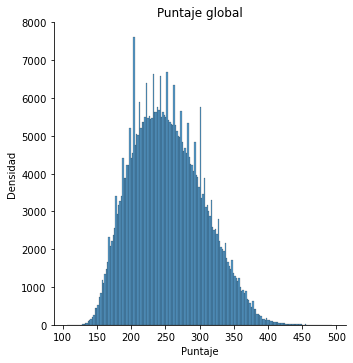

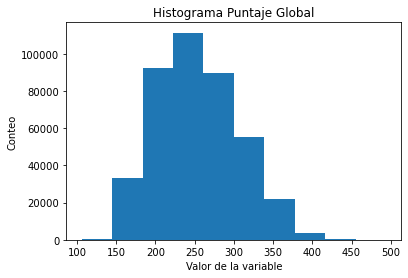

Fitting 4 distributions: 100%|██████████| 4/4 [00:27<00:00,  6.84s/it]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
gamma,0.000022,1451.359310,-9.649047e+06,inf,0.023095,1.740430e-189
lognorm,0.000024,1442.303788,-9.615733e+06,inf,0.022988,9.890807e-188
beta,0.000034,1665.814224,-9.466740e+06,inf,0.035926,0.000000e+00
norm,0.000039,1523.264565,-9.414954e+06,inf,0.039045,0.000000e+00


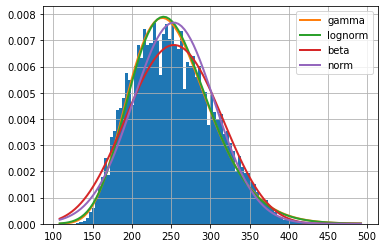

In [13]:
#Histogramas

data = final_df_1['PUNT_GLOBAL']
sns.displot(data)
plt.title('Puntaje global')
plt.xlabel('Puntaje')
plt.ylabel('Densidad')
plt.show()

plt.hist(data)
plt.title('Histograma Puntaje Global')
plt.xlabel('Valor de la variable')
plt.ylabel('Conteo')
plt.show()

#Aplicando Fitter para saber que distribucion es la que mejor se acomoda a nuestros datos

from fitter import Fitter, get_common_distributions, get_distributions
f = Fitter(data,distributions=['gamma','lognorm','beta','norm'])
f.fit()
f.summary()


Text(0.5, 1.0, 'Genero')

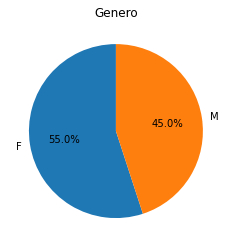

In [14]:
#realizamos una segmentacion de la poblacion y la graficamos en pie
data = final_df_1['ESTU_GENERO'].value_counts()/final_df_1['ESTU_GENERO'].value_counts().sum()
plt.pie(data, labels = data.index, autopct='%1.1f%%', startangle = 90)
plt.title('Genero')

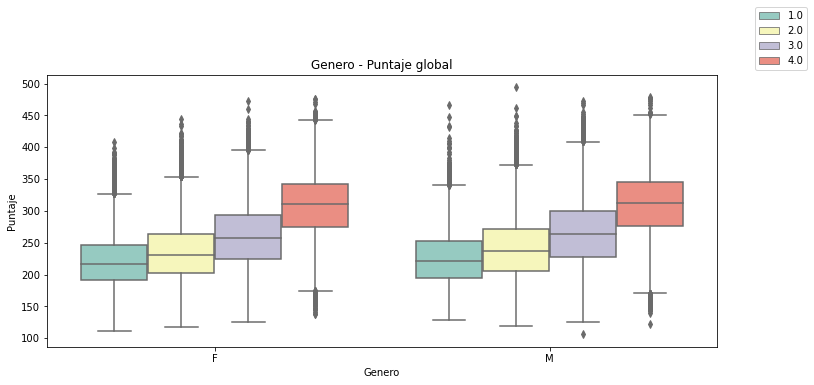

Podemos observar una ligera diferencia entre las medias de los hombres y las mujeres. En el NSE individual vemos tambien que los cuartile del nivel 1 de los hombres son mas pequeños que los de la mujeres  


In [15]:
#Utilizando matplotlib y Seaborn para generar una comparacion de datos utilizando el parametro "hue"

plt.figure(figsize = (12,5))
sns.boxplot(x="ESTU_GENERO", y= "PUNT_GLOBAL", hue="ESTU_NSE_INDIVIDUAL",
                 data= final_df_1, linewidth=1.5, palette="Set3")
plt.title("Genero - Puntaje global")
plt.xlabel("Genero")
plt.ylabel("Puntaje")
plt.legend(bbox_to_anchor=(1.05, 1.0, 0.3, 0.2), loc='lower left')
plt.show()

print("Podemos observar una ligera diferencia entre las medias de los hombres y las mujeres. En el NSE individual vemos tambien que los cuartile del nivel 1 de los hombres son mas pequeños que los de la mujeres  ")

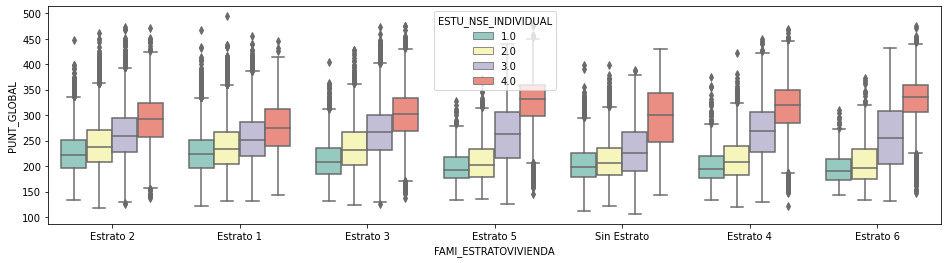

Según los resultados del gráfico se observa un mayor rendimiento en los estratos más altos


In [16]:
#repetimos el proceso anterior con nueva info

plt.figure(figsize=(16,4))
sns.boxplot( y = final_df_1["PUNT_GLOBAL"], x = final_df_1["FAMI_ESTRATOVIVIENDA"],hue=final_df_1["ESTU_NSE_INDIVIDUAL"],palette="Set3" )
plt.show()
print("Según los resultados del gráfico se observa un mayor rendimiento en los estratos más altos")

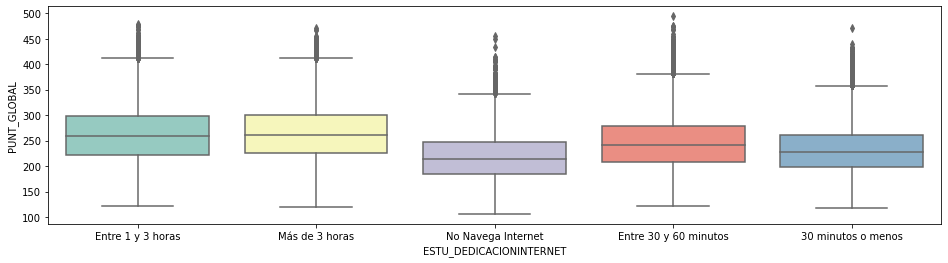

Según los resultados del grafico se observa una relación en estudiar de 1 a 3 horas y más de tres horas, es decir que entre mas tiempo dedicado al estimo mejores resultados 


In [17]:
#repetimos el proceso anterior con diferente info para sacar nuevas conclusiones
plt.figure(figsize=(16,4))
sns.boxplot( y= final_df_1["PUNT_GLOBAL"], x=final_df_1["ESTU_DEDICACIONINTERNET"],palette="Set3" )
plt.show()
print("Según los resultados del grafico se observa una relación en estudiar de 1 a 3 horas y más de tres horas, es decir que entre mas tiempo dedicado al estimo mejores resultados ")

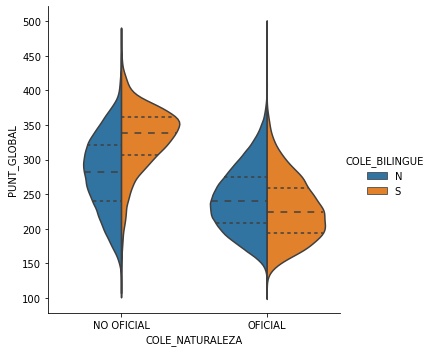

La media es mucho mas alta en los colegios no oficiales, su varianza tambien es menor que en los otros escenarios. Por otro lado, vemos que el hecho de ser o no ser bilingue hace una diferencia bastante marcada.


In [18]:
#Cambiamos de estilo de grafica con la libreria Seaborn para encontrar nuevos patrones
data= final_df_1
sns.catplot(x="COLE_NATURALEZA", y="PUNT_GLOBAL", hue="COLE_BILINGUE",inner="quartile",kind="violin", data=data, split= True)
plt.show()
print("La media es mucho mas alta en los colegios no oficiales, su varianza tambien es menor que en los otros escenarios. Por otro lado, vemos que el hecho de ser o no ser bilingue hace una diferencia bastante marcada.")

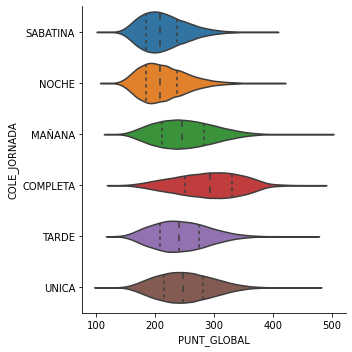

Podemos ver claramente como la jornada completa tiene una media mayor a todas la demas y a pesar de que su varianza e smuy grande, el cuartil 2 es igual a las medias del numero 2. Es decir realmente hace mucho la diferencia completa


In [19]:
#nuevamente variamos la presentacion de las graficas en Seaborn para analizar data de manera diferente
data= final_df_1
sns.catplot(x = "PUNT_GLOBAL", y = "COLE_JORNADA", inner="quartile",data = data, kind = "violin")
plt.show()
print("Podemos ver claramente como la jornada completa tiene una media mayor a todas la demas y a pesar de que su varianza e smuy grande, el cuartil 2 es igual a las medias del numero 2. Es decir realmente hace mucho la diferencia completa")

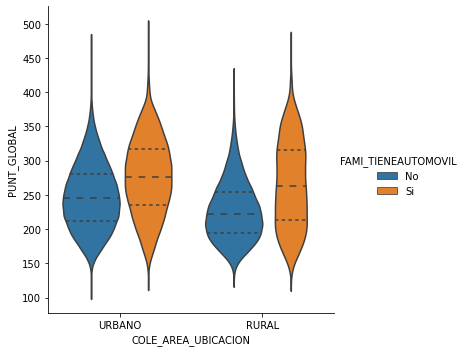

De la data mostrada vemos claramente como hay una diferencia muy grande entre los estudiantes de colegios rurales con auto y sin auto 


In [20]:
sns.catplot(x = "COLE_AREA_UBICACION", y = "PUNT_GLOBAL",hue="FAMI_TIENEAUTOMOVIL", inner="quartile",data = data, kind = "violin")
plt.show()
print("De la data mostrada vemos claramente como hay una diferencia muy grande entre los estudiantes de colegios rurales con auto y sin auto ")

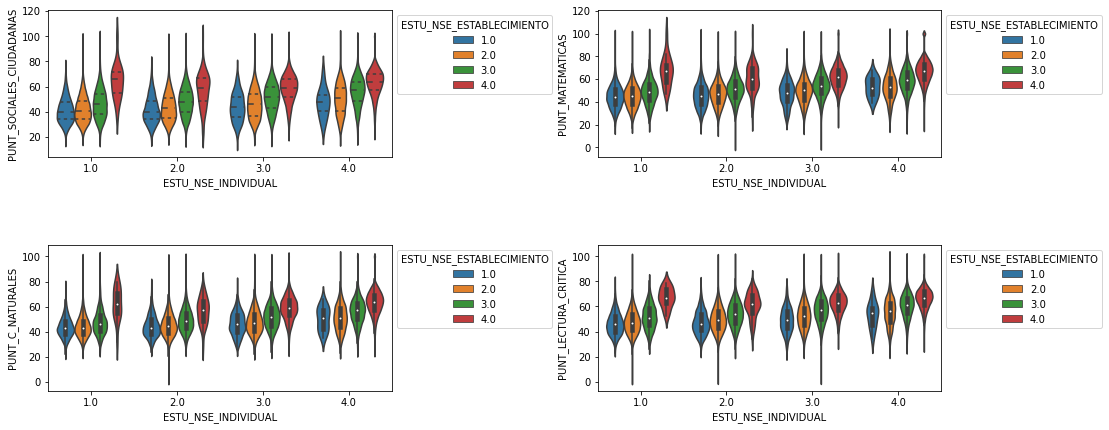

Notamos ciertas fallas en esta grafica pues vemos que todas tienen demasiada varianza, esto nos habla de que hay algo que no esta clasificando bien. Adicionalmente cuando vemos los niveles individuales, notamos que existe una gran diferencia entre estudiar en colegios NSE 1,2 o 3 pues el de nivel 4 muestra una media claramente mas alta que todas las demas


In [21]:
#en este paso quisimos utilizar un metodo diferente con subplots para comprar si el NSE funciona con respecto a las notas de cada una de las competencias
data= final_df_1
fig, ax = plt.subplots(2, 2)
fig.set_size_inches(16, 7)

fig.subplots_adjust(hspace=0.6, wspace=0.6)

sns.violinplot(y = "PUNT_SOCIALES_CIUDADANAS", x = "ESTU_NSE_INDIVIDUAL", hue="ESTU_NSE_ESTABLECIMIENTO",
               data = data, kind = "violin",inner="quartile",ax = ax[0, 0])


sns.violinplot(y = "PUNT_C_NATURALES", x = "ESTU_NSE_INDIVIDUAL",hue="ESTU_NSE_ESTABLECIMIENTO",
               data = data, kind = "violin",ax = ax[1, 0])


sns.violinplot(y = "PUNT_MATEMATICAS", x = "ESTU_NSE_INDIVIDUAL",hue="ESTU_NSE_ESTABLECIMIENTO",
               data = data, kind = "violin",ax = ax[0, 1])


sns.violinplot(y = "PUNT_LECTURA_CRITICA", x = "ESTU_NSE_INDIVIDUAL",hue="ESTU_NSE_ESTABLECIMIENTO",
               data = data, kind = "violin",ax = ax[1, 1])
sns.move_legend(ax[0, 0], "upper left", bbox_to_anchor=(1, 1))
sns.move_legend(ax[1, 0], "upper left", bbox_to_anchor=(1, 1))
sns.move_legend(ax[0, 1], "upper left", bbox_to_anchor=(1, 1))
sns.move_legend(ax[1, 1], "upper left", bbox_to_anchor=(1, 1))



plt.show()
print("Notamos ciertas fallas en esta grafica pues vemos que todas tienen demasiada varianza, esto nos habla de que hay algo que no esta clasificando bien. Adicionalmente cuando vemos los niveles individuales, notamos que existe una gran diferencia entre estudiar en colegios NSE 1,2 o 3 pues el de nivel 4 muestra una media claramente mas alta que todas las demas")

In [22]:
#Usaremos la matriz de correlacion para comenzar a verificar cuales pueden ser nuestras variables mas importantes
corr_matriz = final_df_1.corr()
corr_matriz

,PUNT_LECTURA_CRITICA,PERCENTIL_LECTURA_CRITICA,PUNT_MATEMATICAS,PERCENTIL_MATEMATICAS,PUNT_C_NATURALES,PERCENTIL_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PERCENTIL_SOCIALES_CIUDADANAS,PUNT_INGLES,PERCENTIL_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO
PUNT_LECTURA_CRITICA,1.000000,0.975724,0.752236,0.732801,0.781575,0.761094,0.817918,0.797846,0.714929,0.692259,0.909630,0.891013,0.434945,0.402352,0.432134
PERCENTIL_LECTURA_CRITICA,0.975724,1.000000,0.724505,0.742601,0.755204,0.773982,0.799584,0.813560,0.671721,0.702108,0.881148,0.909807,0.384041,0.361153,0.377789
PUNT_MATEMATICAS,0.752236,0.724505,1.000000,0.959502,0.816187,0.778796,0.754116,0.721138,0.687865,0.650192,0.903553,0.865387,0.430714,0.393847,0.426241
PERCENTIL_MATEMATICAS,0.732801,0.742601,0.959502,1.000000,0.782359,0.799229,0.730086,0.737871,0.634643,0.661274,0.868586,0.892525,0.369668,0.345425,0.360050
PUNT_C_NATURALES,0.781575,0.755204,0.816187,0.782359,1.000000,0.960325,0.816203,0.783590,0.732080,0.691638,0.925978,0.887423,0.440463,0.402047,0.432875
PERCENTIL_C_NATURALES,0.761094,0.773982,0.778796,0.799229,0.960325,1.000000,0.792071,0.804859,0.671795,0.703080,0.889488,0.917148,0.373320,0.348865,0.362456
PUNT_SOCIALES_CIUDADANAS,0.817918,0.799584,0.754116,0.730086,0.816203,0.792071,1.000000,0.974862,0.707972,0.676410,0.924004,0.900746,0.417623,0.381561,0.419892
PERCENTIL_SOCIALES_CIUDADANAS,0.797846,0.813560,0.721138,0.737871,0.783590,0.804859,0.974862,1.000000,0.654319,0.681412,0.890786,0.920116,0.358107,0.333455,0.357441
PUNT_INGLES,0.714929,0.671721,0.687865,0.634643,0.732080,0.671795,0.707972,0.654319,1.000000,0.926207,0.812989,0.747765,0.571253,0.520516,0.562360
PERCENTIL_INGLES,0.692259,0.702108,0.650192,0.661274,0.691638,0.703080,0.676410,0.681412,0.926207,1.000000,0.772318,0.787774,0.474714,0.446781,0.456886


<AxesSubplot:>

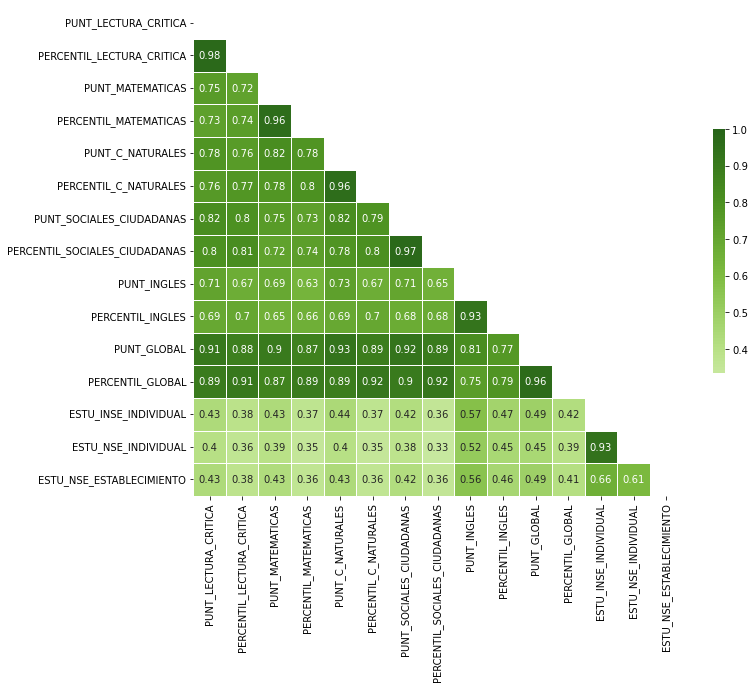

In [23]:
#ahora utilizamos la libreria Seaborn para ver mas claramente dodne estan las variables que mas nos interesan
corr = final_df_1.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(1000, 1000, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap="PiYG",annot=True, vmax=1, center=0,
            square=True, linewidths=.8, cbar_kws={"shrink": .5})

## Fase 3: Creacion de modelo predictivo con regresion logistica y regresion lineal multivariada

En esta fase propondrás, implementarás y reportarás el desempeño de uno o más modelos (al menos uno predictivo) que busquen explicar las relaciones entre factores sociodemográficos y el desempeño en la prueba. Además, concluirás con respecto a la validez de al menos un modelo y los posibles hallazgos que se podrían reportar para el *stakeholder*.

Preguntas guía:

* ¿Existe algún sub-conjunto de variables socio-demográficas que explique razonablemente bien el desempeño de los estudiantes en la prueba?

Estrategias clave

* Creacion de modelos analiticos con scikitlearn y statsmodel. Metricas de rendimiento del modelo

#### Modelo 1

 Se realiza un modelo de regresión lineal múltiple, con el fin de determinar si existe algún subconjunto de variables que explique razonablemente bien el desempeño académico de los estudiantes en la prueba saber 11. Se desea estimar el puntaje global y las variables explicativas son: el código NSE del estudiante (X1)  y el código NSE del colegio (X2).  

In [24]:
# Se divide el dataset con el fin de entrenar el modelo 
final_df_1_train=final_df_1.sample(frac=0.80,random_state=18)
final_df_1_train

,ESTU_GENERO,ESTU_FECHANACIMIENTO,ESTU_PAIS_RESIDE,ESTU_TIENEETNIA,ESTU_NACIONALIDAD,ESTU_DEPTO_RESIDE,FAMI_ESTRATOVIVIENDA,FAMI_PERSONASHOGAR,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,...,PERCENTIL_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO,FAMI_TIENEAUTOMOVIL,FAMI_TIENEINTERNET,FAMI_TIENEMOTOCICLETA,FAMI_NUMLIBROS
279427,F,26/12/2002,COLOMBIA,No,COLOMBIA,CESAR,Estrato 1,3 a 4,Ninguno,Primaria incompleta,...,40.0,193,16.0,36.688297,1.0,2.0,No,No,No,0 A 10 LIBROS
333025,F,06/09/2004,COLOMBIA,No,COLOMBIA,BOGOTÁ,Estrato 2,9 o más,Secundaria (Bachillerato) incompleta,Primaria completa,...,84.0,297,83.0,53.929966,3.0,3.0,Si,Si,Si,11 A 25 LIBROS
240638,F,11/04/2005,COLOMBIA,Si,COLOMBIA,CAUCA,Estrato 2,3 a 4,Secundaria (Bachillerato) incompleta,Técnica o tecnológica completa,...,20.0,187,12.0,49.228677,2.0,2.0,Si,Si,Si,0 A 10 LIBROS
391734,F,24/12/2004,COLOMBIA,No,COLOMBIA,BOGOTÁ,Estrato 2,3 a 4,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,...,58.0,228,39.0,60.936996,3.0,2.0,Si,Si,Si,0 A 10 LIBROS
365764,F,16/02/2004,COLOMBIA,No,COLOMBIA,BOLIVAR,Sin Estrato,7 a 8,Ninguno,Ninguno,...,33.0,182,10.0,39.149871,1.0,2.0,No,No,Si,0 A 10 LIBROS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108979,F,19/05/2004,COLOMBIA,No,COLOMBIA,VALLE,Estrato 3,5 a 6,Postgrado,Secundaria (Bachillerato) completa,...,94.0,272,70.0,65.054304,4.0,3.0,Si,Si,No,26 A 100 LIBROS
542315,M,11/06/2003,COLOMBIA,No,COLOMBIA,BOYACA,Estrato 2,3 a 4,Ninguno,Ninguno,...,22.0,227,38.0,42.618174,2.0,2.0,No,Si,No,0 A 10 LIBROS
210656,F,03/03/2003,COLOMBIA,No,COLOMBIA,VALLE,Estrato 2,3 a 4,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,...,86.0,279,74.0,50.352754,2.0,3.0,No,Si,Si,0 A 10 LIBROS
342519,M,28/10/2005,COLOMBIA,No,COLOMBIA,TOLIMA,Estrato 1,3 a 4,No sabe,Secundaria (Bachillerato) incompleta,...,97.0,321,92.0,46.516314,2.0,2.0,No,Si,No,0 A 10 LIBROS


In [25]:
# Se deben transformar las variables categoricas en dummies

data_regresion = final_df_1_train[['PUNT_GLOBAL', 'ESTU_NSE_INDIVIDUAL', 'ESTU_NSE_ESTABLECIMIENTO']]
data_regresion = pd.get_dummies(data_regresion, columns = ['ESTU_NSE_INDIVIDUAL'],drop_first= True)
data_regresion = pd.get_dummies(data_regresion, columns = ['ESTU_NSE_ESTABLECIMIENTO'],drop_first= True)

In [26]:
# Se corre el modelo de regresion lineal multiple 

modelo_regresion_multi = ols('PUNT_GLOBAL ~  C(ESTU_NSE_INDIVIDUAL) +C(ESTU_NSE_ESTABLECIMIENTO)', data=final_df_1_train)
fitted_modelo_regresion_multi = modelo_regresion_multi.fit()
print(fitted_modelo_regresion_multi.summary())

                            OLS Regression Results                            
Dep. Variable:            PUNT_GLOBAL   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                 2.185e+04
Date:                Fri, 17 Feb 2023   Prob (F-statistic):               0.00
Time:                        22:23:18   Log-Likelihood:            -1.6975e+06
No. Observations:              326407   AIC:                         3.395e+06
Df Residuals:                  326400   BIC:                         3.395e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

El primer modelo de regresión multiple se realizo con base en las variables INSE y NSE dado que en la documentación del ICFES se especifica que dichas variables contienen las caracteristas socio economicas más importantes de los estudiantes. Sin embargo, se realizará un modelo con variables de interés en el caso de estudio para contrastar los resultados.

In [27]:
modelo_regresion_multi_2 = ols('PUNT_GLOBAL ~ C(ESTU_GENERO) + C(FAMI_ESTRATOVIVIENDA) + C(FAMI_TIENEINTERNET) + C(FAMI_TIENEMOTOCICLETA) + C(FAMI_NUMLIBROS) + C(FAMI_COMECARNEPESCADOHUEVO) + C(ESTU_HORASSEMANATRABAJA) + C(COLE_AREA_UBICACION) + C(COLE_JORNADA) + C(COLE_NATURALEZA) + C(FAMI_EDUCACIONMADRE)' , data=final_df_1_train)
fitted_modelo_regresion_multi_2 = modelo_regresion_multi_2.fit()
print(fitted_modelo_regresion_multi_2.summary())

                            OLS Regression Results                            
Dep. Variable:            PUNT_GLOBAL   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.320
Method:                 Least Squares   F-statistic:                     4161.
Date:                Fri, 17 Feb 2023   Prob (F-statistic):               0.00
Time:                        22:23:31   Log-Likelihood:            -1.6895e+06
No. Observations:              326407   AIC:                         3.379e+06
Df Residuals:                  326369   BIC:                         3.380e+06
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                                                                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

Debido a que el modelo cuenta con R cuadrado bajo, se planteo la posibilidad de realizar un segundo modelo de regresión logistica que clasifique los datos de acuerdo a una pregunta especifica. 

#### Modelo 2

El programa "Ser Pilo Paga" ejecutado durante el periodo presidencial de Juan Manuel Santos tuvo un gran impacto en la sociedad. Uno de los requisitos era obtener un puntaje superior a 342. Es por esto, que la pregunta de interés para desarrollar el Modelo 2 es determinar las caracteristicas de los estudiantes que han obtenido un puntaje superior al necesario para ser parte del programa. 

In [28]:
# Definir la data para el modelo 2 

df_mod_2 =  final_df_1[['PUNT_GLOBAL', 'ESTU_GENERO', 'FAMI_ESTRATOVIVIENDA' ,  'FAMI_TIENEINTERNET', 'FAMI_TIENEMOTOCICLETA', 'FAMI_NUMLIBROS', 'FAMI_COMECARNEPESCADOHUEVO' , 'ESTU_HORASSEMANATRABAJA' , 'COLE_AREA_UBICACION', 'COLE_JORNADA' , 'COLE_NATURALEZA', 'FAMI_EDUCACIONMADRE']]

In [29]:
# Calcular la variable de interés "Y" en la base de datos 
df_mod_2["y"] = (df_mod_2["PUNT_GLOBAL"] > 342)*1
df_mod_2["y"] = pd.Categorical(df_mod_2["y"])
df_mod_2.head()

C:\Users\OMEN Laptop\AppData\Local\Temp\ipykernel_21344\2383999710.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mod_2["y"] = (df_mod_2["PUNT_GLOBAL"] > 342)*1
C:\Users\OMEN Laptop\AppData\Local\Temp\ipykernel_21344\2383999710.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mod_2["y"] = pd.Categorical(df_mod_2["y"])


,PUNT_GLOBAL,ESTU_GENERO,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_TIENEMOTOCICLETA,FAMI_NUMLIBROS,FAMI_COMECARNEPESCADOHUEVO,ESTU_HORASSEMANATRABAJA,COLE_AREA_UBICACION,COLE_JORNADA,COLE_NATURALEZA,FAMI_EDUCACIONMADRE,y
1,161,F,Estrato 2,Si,No,0 A 10 LIBROS,Todos o casi todos los días,Entre 11 y 20 horas,URBANO,SABATINA,NO OFICIAL,Secundaria (Bachillerato) completa,0
2,174,F,Estrato 1,Si,Si,0 A 10 LIBROS,Todos o casi todos los días,0,URBANO,NOCHE,OFICIAL,Secundaria (Bachillerato) incompleta,0
3,277,M,Estrato 3,Si,No,0 A 10 LIBROS,3 a 5 veces por semana,0,URBANO,MAÑANA,NO OFICIAL,Educación profesional completa,0
4,206,M,Estrato 3,Si,No,11 A 25 LIBROS,3 a 5 veces por semana,0,URBANO,NOCHE,OFICIAL,Educación profesional incompleta,0
5,197,M,Estrato 1,No,No,0 A 10 LIBROS,Todos o casi todos los días,Más de 30 horas,URBANO,NOCHE,OFICIAL,Técnica o tecnológica incompleta,0


In [30]:
pd.value_counts(df_mod_2['y'])

0    385678
1     22331
Name: y, dtype: int64

Text(0.5, 1.0, 'Estudiantes con puntajes mayores a 342')

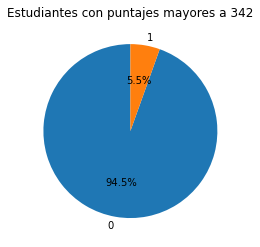

In [31]:
data = df_mod_2['y'].value_counts()/df_mod_2['y'].value_counts().sum()
plt.pie(data, labels = data.index, autopct='%1.1f%%', startangle = 90)
plt.title('Estudiantes con puntajes mayores a 342')

In [32]:
df_mod_2_final= df_mod_2.drop(['PUNT_GLOBAL'], axis=1)
df_mod_2_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 408009 entries, 1 to 583990
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   ESTU_GENERO                 408009 non-null  object  
 1   FAMI_ESTRATOVIVIENDA        408009 non-null  object  
 2   FAMI_TIENEINTERNET          408009 non-null  object  
 3   FAMI_TIENEMOTOCICLETA       408009 non-null  object  
 4   FAMI_NUMLIBROS              408009 non-null  object  
 5   FAMI_COMECARNEPESCADOHUEVO  408009 non-null  object  
 6   ESTU_HORASSEMANATRABAJA     408009 non-null  object  
 7   COLE_AREA_UBICACION         408009 non-null  object  
 8   COLE_JORNADA                408009 non-null  object  
 9   COLE_NATURALEZA             408009 non-null  object  
 10  FAMI_EDUCACIONMADRE         408009 non-null  object  
 11  y                           408009 non-null  category
dtypes: category(1), object(11)
memory usage: 37.7+ MB


In [33]:
df_mod_2_final= pd.get_dummies(df_mod_2_final, columns= ["ESTU_GENERO",
"FAMI_ESTRATOVIVIENDA",
"FAMI_TIENEINTERNET",
"FAMI_TIENEMOTOCICLETA",
"FAMI_NUMLIBROS",
"FAMI_COMECARNEPESCADOHUEVO",
"ESTU_HORASSEMANATRABAJA",
"COLE_AREA_UBICACION",
"COLE_JORNADA",
"COLE_NATURALEZA",
"FAMI_EDUCACIONMADRE"])

In [34]:
df_mod_2_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 408009 entries, 1 to 583990
Data columns (total 49 columns):
 #   Column                                                    Non-Null Count   Dtype   
---  ------                                                    --------------   -----   
 0   y                                                         408009 non-null  category
 1   ESTU_GENERO_F                                             408009 non-null  uint8   
 2   ESTU_GENERO_M                                             408009 non-null  uint8   
 3   FAMI_ESTRATOVIVIENDA_Estrato 1                            408009 non-null  uint8   
 4   FAMI_ESTRATOVIVIENDA_Estrato 2                            408009 non-null  uint8   
 5   FAMI_ESTRATOVIVIENDA_Estrato 3                            408009 non-null  uint8   
 6   FAMI_ESTRATOVIVIENDA_Estrato 4                            408009 non-null  uint8   
 7   FAMI_ESTRATOVIVIENDA_Estrato 5                            408009 non-null  uint8   

In [35]:
#Variables predictoras 
X = df_mod_2_final.iloc[:,1:49]
#Variable respuesta 
y = df_mod_2_final.y

In [36]:
#Entrenamiento y test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# Declaramos una instancia del modelo
lr = LogisticRegression()
#entrenar el modelo 
lr.fit(X_train, y_train)
# Utilizamos el modelo para predecir
y_pred = lr.predict(X_test)

c:\Users\OMEN Laptop\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


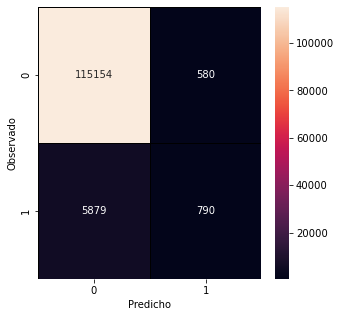

In [37]:
y_pred = lr.predict (X_test)
y_true = y_test
MC = confusion_matrix(y_true ,y_pred)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(MC, annot =True, linewidths = 0.5, linecolor ="black",fmt = ".0f", ax = ax)
plt.xlabel("Predicho")
plt.ylabel("Observado")
plt.show()

In [38]:
confusion_matrix = pd.crosstab(
    y_test.ravel(),
    y_pred,
    rownames=['Real'],
    colnames=['Predicción']
)
confusion_matrix

Predicción,0,1
Real,,
0,115154,580
1,5879,790


In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97    115734
           1       0.58      0.12      0.20      6669

    accuracy                           0.95    122403
   macro avg       0.76      0.56      0.58    122403
weighted avg       0.93      0.95      0.93    122403



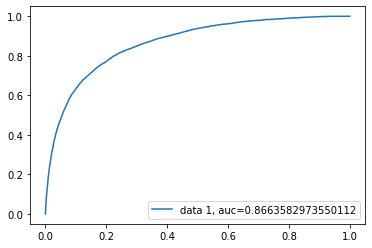

In [40]:
from sklearn import metrics
y_pred_proba = lr.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## Fase 4: creacion de herramienta analitica visual para la toma de decisiones de negocio

En esta ultima etapa se busca crear una herramienta de visualizacion para la toma de decisiones buscando de esta manera generar valor al negocio.

Estrategias clave:

* Creacion de herramienta de visualizaicon con ipywidgets. Visualizacion de resultados para la toma de decisiones de negocio.

In [41]:
#
def copiar_df (df):
    return df.copy()

df_v = copiar_df(final_df_1) # Cambiar por base completa si es necesario 
Variables=[i for i in df_v.drop(['PUNT_GLOBAL'], axis = 1, inplace = False).columns]
Variables.insert(0, "COLE_JORNADA")

In [42]:
#vamos a crear una nueva funcion que tome las diferentes variables y las filtre por puntajes de manera interactiva
def filtrar(Variables, Puntaje):
    df = df_v
    if Variables != "Todos": 
        plt.figure(figsize = (6,6))
        display(sns.boxplot( y = Variables   , x = "PUNT_GLOBAL" , data=df , order = sorted(df[Variables].unique().tolist()) ));
        plt.show()
        display(df[(df["PUNT_GLOBAL"] <= Puntaje)][Variables].groupby(df[Variables]).count().plot(kind="pie", autopct='%.2f%%', figsize = (6,6)))
        plt.title(str(Variables) + "- PUNTAJE GLOBAL ")
        plt.show()
        display(df[(df["PUNT_GLOBAL"] <= Puntaje)][Variables].groupby(df[Variables]).count().plot(kind="bar", figsize = (6,6)))
        plt.title(str(Variables) + "- PUNTAJE GLOBAL ")
        plt.show()
    else:
        plt.figure(figsize = (4,3))
        display(sns.boxplot( y = Variables   , x = "PUNT_GLOBAL" , data=df , order = sorted(df[Variables].unique().tolist()) ));
        plt.title("Puntaje global")
        plt.xlabel('Puntaje')
        plt.ylabel('Densidad')
        plt.show();
 
interactive_plot = interactive(
                                filtrar, 
                                Variables = Variables,
                                Puntaje = (df_v["PUNT_GLOBAL"].min(), df_v["PUNT_GLOBAL"].max(), 50) 
                                
                              )

In [43]:
display(interactive_plot)

interactive(children=(Dropdown(description='Variables', options=('COLE_JORNADA', 'ESTU_GENERO', 'ESTU_FECHANAC…